# Predicting Cardiovascular Disease Prevalence Globally

The aim of this project is to see if we can predict cardiovascular disease prevalence by a country's natural and social environmental factors. While the biological mechanisms behind why factors such as crime in an area influence cardiovascular disease risks are a bit unclear, several studies have shown evidence for a link [1,2]. For instance, a study by Penn Medicine has shown that in neighborhoods where violent crime fell the most, cardiovascular disease mortality fell greatly as well [2]. Since cardiovascular disease has historically been quite prevalent in mine and my peer's families, I sought out publically available data on a country's economic, environmental, and geographic locations to attempt to predict cardiovascular diease prevalence in that country. 

In [66]:
#Imports
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

## Data Prepping

For this study, the environmental factors I chose to select were country region, country GDP, cost of healthy diet, country air pollution, and country crime index.

### Retriving Cardiovascular Disease Prevalence for Each Country (2019)

To gather cardiovascular disease prevalence values for each country, I used the *Institute for Health Metrics and Evaluation's* Global Health Data Exchange website [3]. 

In [67]:
#Loading dataset
CVDprev_all = pd.read_excel('/Users/guptaj/Documents/Personal Projects/HDPrevModel/CVDPrev.xlsx')
CVDprev_all.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,5,Prevalence,7,Democratic People's Republic of Korea,3,Both,22,All ages,491,Cardiovascular diseases,2,Percent,2019,0.073616,0.077607,0.069795
1,5,Prevalence,11,Indonesia,3,Both,22,All ages,491,Cardiovascular diseases,2,Percent,2019,0.053118,0.056436,0.050027
2,5,Prevalence,30,Vanuatu,3,Both,22,All ages,491,Cardiovascular diseases,2,Percent,2019,0.048644,0.051591,0.045853
3,5,Prevalence,6,China,3,Both,22,All ages,491,Cardiovascular diseases,2,Percent,2019,0.088297,0.094041,0.083160
4,5,Prevalence,18,Thailand,3,Both,22,All ages,491,Cardiovascular diseases,2,Percent,2019,0.076507,0.080784,0.072213


In [68]:
#Getting only country name and CVD prevalence value
CVDprev = CVDprev_all[["location_name","val"]]
CVDprev.head()

,location_name,val
0,Democratic People's Republic of Korea,0.073616
1,Indonesia,0.053118
2,Vanuatu,0.048644
3,China,0.088297
4,Thailand,0.076507


In [69]:
#Changing the names of columns and creating a new dataframe (df) that the response and predictors will be stored in
df = CVDprev.rename(columns={"location_name":"Country","val":"CVD Prev"})

In [70]:
df.head()

,Country,CVD Prev
0,Democratic People's Republic of Korea,0.073616
1,Indonesia,0.053118
2,Vanuatu,0.048644
3,China,0.088297
4,Thailand,0.076507


### Retriving Country GDP and Region

To retrieve each country's Gross Domestic Product (GDP) and its region, I used data from the *World Bank* [4]. 

In [71]:
#Loading datasets
GDP_all = pd.read_excel('/Users/guptaj/Documents/Personal Projects/HDPrevModel/GDP_country.xlsx')
region_all = pd.read_excel('/Users/guptaj/Documents/Personal Projects/HDPrevModel/GDP_country.xlsx', sheet_name="Metadata - Countries")

In [72]:
GDP_all.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,Last Updated Date,2023-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,...,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03,2.022000e+03
3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN
4,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,...,9.859871e+11,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12


We can see from the initial look that the first two rows do not contain data but rather when the data was last updated. 
To fix this, we can delete the first two rows and make row 2, which contains data labels, our header. 

In [73]:
#Delete  first two rows and making row 2 the header
GDP_all = GDP_all.loc[2:len(GDP_all),:].reset_index()
GDP_all.columns = GDP_all.iloc[0]
GDP_all = GDP_all[1:].reset_index()

In [74]:
#looking for the 2019 data and extracting our country and its respective GDP
GDP_country = pd.Series(GDP_all["Country Name"],name="Country")
GDP = pd.Series(GDP_all[2019.0], name='GDP')
gdp_df = pd.concat([GDP_country,GDP], axis=1).reset_index()

In [75]:
gdp_df.head()

,index,Country,GDP
0,0,Aruba,3.395794e+09
1,1,Africa Eastern and Southern,1.000834e+12
2,2,Afghanistan,1.890450e+10
3,3,Africa Western and Central,8.225384e+11
4,4,Angola,6.930911e+10


In [76]:
#Merging the main dataframe (df) and the GDP dataframe
df = pd.merge(df,gdp_df,on="Country")
df = df.drop(["index"], axis=1) #Dont need index column anymore

In [77]:
region_all.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola


In [78]:
#Retriving country name and its region from region data
region_df = region_all[["TableName","Region"]]
region_df = region_df.rename(columns={"TableName":"Country"})

In [79]:
#Merging the main dataframe (df) and the region dataframe
df = pd.merge(df,region_df,on="Country")

### Retriving Cost of a Healthy Diet 

The estimates of the cost of a healthy diet in each country was collected from the *Food and Agriculture Organization of the United Nations'* website [5]. 

In [80]:
#Loading dataset
costdiet_all = pd.read_excel('/Users/guptaj/Documents/Personal Projects/HDPrevModel/CostofDiet_Country.xlsx')

In [81]:
costdiet_all.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Unit,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F,Y2021,Y2021F
0,3,'008,Albania,7004,Cost of a healthy diet (PPP dollar per person ...,6226,Value,PPP dollar per person per day,3.952,E,4.069,E,4.262,E,4.28,E,4.388,E
1,3,'008,Albania,7007,Cost of starchy staples,6226,Value,PPP dollar per person per day,0.599,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,'008,Albania,7008,Cost of animal source foods,6226,Value,PPP dollar per person per day,1.204,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,'008,Albania,7009,"Cost of legumes, nuts and seeds",6226,Value,PPP dollar per person per day,0.441,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,'008,Albania,7010,Cost of vegetables,6226,Value,PPP dollar per person per day,0.707,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#Keeping the rows with data on the "Cost of a healthy diet" from Item column
costdiet = costdiet_all[costdiet_all["Item"]=="Cost of a healthy diet (PPP dollar per person per day)"]

In [83]:
#Retrieving data from 2019 and country name
costdiet_country = costdiet["Area"]
costdiet_value = costdiet["Y2019"]
costdiet_df = pd.concat([costdiet_country,costdiet_value], axis=1).reset_index()
costdiet_df = costdiet_df.rename(columns={"Area":"Country","Y2019":"Cost of Healthy Diet"})

In [84]:
costdiet_df.head()

,index,Country,Cost of Healthy Diet
0,0,Albania,4.262
1,9,Algeria,3.796
2,18,Angola,4.352
3,33,Antigua and Barbuda,4.391
4,42,Argentina,NaN


In [85]:
#Merging the main dataframe (df) and the cost of a healthy diet dataframe
df = pd.merge(df,costdiet_df,on="Country")
df = df.drop(["index"], axis=1) #Dont need index column anymore

### Retriving Country Air Pollution

Air pollution data from each country was collected from the *Our World in Data* website [6]. 

In [86]:
#Loading dataset
airpoll_all = pd.read_excel('/Users/guptaj/Documents/Personal Projects/HDPrevModel/AirPollution_Country.xlsx')

In [87]:
airpoll_all

,Entity,Code,Year,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"
0,Afghanistan,AFG,1990,65.486790
1,Afghanistan,AFG,1995,65.179510
2,Afghanistan,AFG,2000,64.922460
3,Afghanistan,AFG,2005,64.522680
4,Afghanistan,AFG,2010,65.245590
...,...,...,...,...
2491,Zimbabwe,ZWE,2013,23.111088
2492,Zimbabwe,ZWE,2014,22.805950
2493,Zimbabwe,ZWE,2015,21.733710
2494,Zimbabwe,ZWE,2016,21.726948


Since data in 2019 is not present in this dataset, we can use 2017 data. 

In [88]:
#Retrieving PM2.5 air pollution mean annual exposure from dataset along with country name
airpoll = airpoll_all[airpoll_all["Year"]==2017]
airpoll_df = airpoll[["Entity","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"]].reset_index()
airpoll_df = airpoll_df.rename(columns={"Entity":"Country","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)":"PM2.5 Mean Exposure"})

In [89]:
airpoll

,Entity,Code,Year,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"
11,Afghanistan,AFG,2017,56.910810
23,Albania,ALB,2017,18.200602
35,Algeria,DZA,2017,38.884010
47,American Samoa,ASM,2017,12.473821
59,Andorra,AND,2017,10.307621
...,...,...,...,...
2447,West Bank and Gaza,NaN,2017,33.225630
2459,World,OWID_WRL,2017,45.673336
2471,Yemen,YEM,2017,50.456005
2483,Zambia,ZMB,2017,27.438034


In [90]:
airpoll_df.head()

,index,Country,PM2.5 Mean Exposure
0,11,Afghanistan,56.910810
1,23,Albania,18.200602
2,35,Algeria,38.884010
3,47,American Samoa,12.473821
4,59,Andorra,10.307621


In [91]:
#Merging the main dataframe (df) and air pollution data
df = pd.merge(df,airpoll_df,on="Country")
df = df.drop(["index"], axis=1) #Dont need index column anymore

### Retrieving Country Crime Index

Country crime index was retrieved from *Numbeo* [7]. 

In [92]:
#Loading dataset
crime_all = pd.read_excel('/Users/guptaj/Documents/Personal Projects/HDPrevModel/Crime_Country.xlsx')

In [93]:
crime_all.head()

,Country,Crime Index,Safety index
0,Venezuela,84.2,15.8
1,Papua New Guinea,80.2,19.8
2,South Africa,77.1,22.9
3,Afghanistan,76.4,23.6
4,Honduras,74.8,25.2


In [94]:
#Retriving only country name and crime index
crime_df = crime_all[["Country","Crime Index"]]

In [95]:
crime_df.head()

,Country,Crime Index
0,Venezuela,84.2
1,Papua New Guinea,80.2
2,South Africa,77.1
3,Afghanistan,76.4
4,Honduras,74.8


In [96]:
#Merging the main dataframe (df) and crime index data
df = pd.merge(df,crime_df,on="Country")

## Data Cleaning

Next, we embark ensuring our data is clean. 

In [97]:
df.head()

,Country,CVD Prev,GDP,Region,Cost of Healthy Diet,PM2.5 Mean Exposure,Crime Index
0,Indonesia,0.053118,1.119100e+12,East Asia & Pacific,4.268,16.502653,46.2
1,Thailand,0.076507,5.439767e+11,East Asia & Pacific,4.181,26.256727,39.4
2,Fiji,0.061513,5.481693e+09,East Asia & Pacific,3.858,10.840160,57.9
3,Cambodia,0.041011,2.708939e+10,East Asia & Pacific,3.778,25.614292,51.2
4,Azerbaijan,0.074423,4.817424e+10,Europe & Central Asia,2.459,19.928663,31.7


In [98]:
#Checking for any missing data
df.isna().any()

Country                 False
CVD Prev                False
GDP                     False
Region                  False
Cost of Healthy Diet     True
PM2.5 Mean Exposure     False
Crime Index             False
dtype: bool

In [99]:
#Getting indices of missing data
missingi = df[df["Cost of Healthy Diet"].isnull()].index.tolist()
print(missingi)

[40, 92]


In [100]:
#Dropping indices with missing data
df = df.drop(missingi, axis=0).reset_index()
df = df.drop(["index"], axis=1) #Dont need index column anymore

In [101]:
Regionfreq = df["Region"].value_counts(sort=False)
Regionfreq

South Asia                     6
North America                  1
East Asia & Pacific           12
Sub-Saharan Africa            12
Middle East & North Africa    13
Europe & Central Asia         34
Latin America & Caribbean     16
Name: Region, dtype: int64

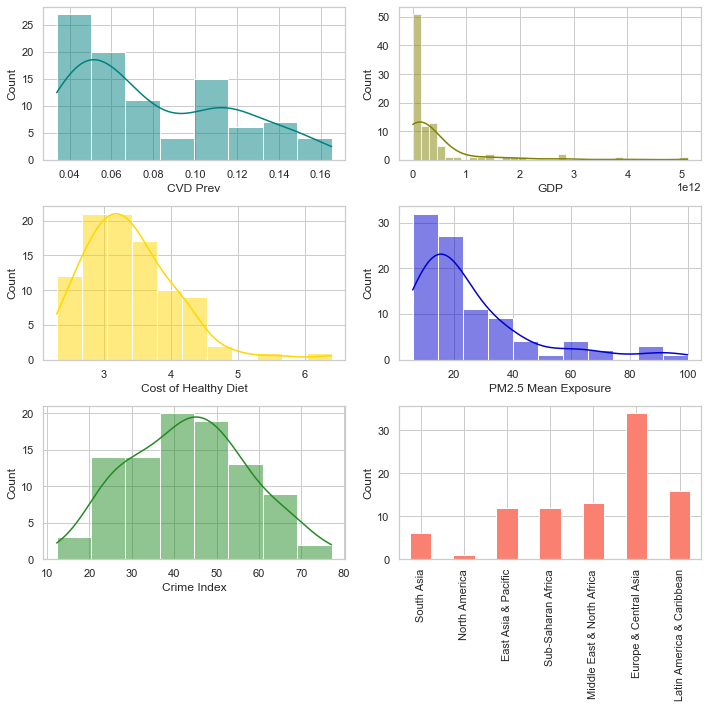

In [102]:
#Viewing Distributions of Data
sns.set(style="whitegrid")  
fig,axs = plt.subplots(3,2, figsize = (10,10))
CVDplt = sns.histplot(data=df, x="CVD Prev", kde=True, color="teal", ax=axs[0, 0])
GDPplt = sns.histplot(data=df, x="GDP", kde=True, color="olive", ax=axs[0, 1])
Costplot = sns.histplot(data=df, x="Cost of Healthy Diet", kde=True, color="gold", ax=axs[1, 0])
Airplt = sns.histplot(data=df, x="PM2.5 Mean Exposure", kde=True, color="mediumblue", ax=axs[1, 1])
Crimeplt = sns.histplot(data=df, x="Crime Index", kde=True, color="forestgreen", ax=axs[2, 0])
Regionplt = df["Region"].value_counts(sort=False).plot.bar(y="Region Frequency",color='salmon', ax=axs[2,1])
Regionplt.set_ylabel("Count")
fig.tight_layout()

In [103]:
#Standardizing Data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_num = df[["CVD Prev", "GDP", "Cost of Healthy Diet", "PM2.5 Mean Exposure", "Crime Index"]]
df_cat = df[["Country","Region"]]
x = df_num.values
x_scal = min_max_scaler.fit_transform(x)
df_numscal = pd.DataFrame(x_scal)
df_numscal = df_numscal.rename(columns={0:"CVD Prev",1:"GDP",2:"Cost of Healthy Diet",3:"PM2.5 Mean Exposure",4:"Crime Index"})
df_scal = pd.concat([df_cat,df_numscal], axis=1)

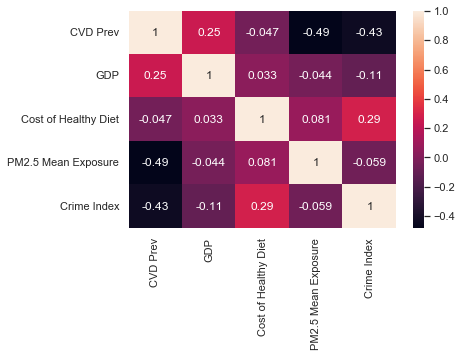

In [104]:
#Getting Correlation Coefficients
corr_matrix = df_scal.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

We can see from the correlation matrix that there are no high degrees of correlation amongst any of the variables. 

Since the region data is categorical, we can apply One Hot Encoding to transform the data to numerical for use in our regression problem. 

In [105]:
#Finding Unique values in this column
cat_feat = df[["Region"]]
print(pd.unique(cat_feat["Region"]))

['East Asia & Pacific' 'Europe & Central Asia' 'South Asia'
 'Middle East & North Africa' 'Latin America & Caribbean' 'North America'
 'Sub-Saharan Africa']


In [106]:
#One Hot Encoding for Region Data
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
cat_feat_encoded = ohe.fit_transform(cat_feat)
cat_feat_encoded_df = pd.DataFrame(cat_feat_encoded, columns=ohe.categories_)

In [107]:
cat_feat_encoded_df

,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
89,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90,0.0,0.0,0.0,0.0,0.0,0.0,1.0
91,0.0,0.0,0.0,0.0,0.0,0.0,1.0
92,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [108]:
#Generating the final dataframe 
final_df = pd.concat([cat_feat_encoded_df,df_scal], axis=1)
final_df = final_df.drop(["Region","Country",], axis=1)
final_df.head()

,"(East Asia & Pacific,)","(Europe & Central Asia,)","(Latin America & Caribbean,)","(Middle East & North Africa,)","(North America,)","(South Asia,)","(Sub-Saharan Africa,)",CVD Prev,GDP,Cost of Healthy Diet,PM2.5 Mean Exposure,Crime Index
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146779,0.218291,0.480741,0.113359,0.523148
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.324865,0.105865,0.459532,0.217266,0.418210
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210699,0.000599,0.380790,0.053038,0.703704
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054597,0.004823,0.361287,0.210422,0.600309
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.308996,0.008945,0.039737,0.149855,0.299383


## Multivariate Linear Regression

Now we build a multivariate linear regression model and evaluate it. 

In [109]:
#Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [110]:
#Splitting Dataset into response (y) and predictors (X)
X = final_df.drop(["CVD Prev"], axis=1)
y = final_df[["CVD Prev"]]

#Splitting Data into training and testing and fitting linear regression model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

#Fitting multivariate linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

C:\Users\guptaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [111]:
#Using model for prediction of test data
y_pred = model.predict(X_test)

C:\Users\guptaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


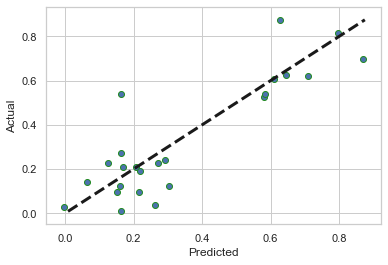

In [112]:
#Plotting model predicted CVD prevalence with actual data
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors="forestgreen")
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [113]:
#Evaluating model based on test set
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.09458578149549053
MSE is 0.016905001168666348
R2 score is 0.7515956614387264


With an R^2 value of approximately 0.752, this model explains a significant amount of variance in CVD prevalence. Relatively low values for mean absolute error and mean squared error, the regression model does a fairly good job in predicting CVD prevalence. 

In [114]:
#Getting our regression coefficients
coefs = pd.DataFrame(data = model.coef_).T
cols = pd.DataFrame(data=X.columns.values)
cols = cols.rename({0:"Variable"}, axis=1)
coefs = coefs.rename({0:"Coefficients"}, axis=1)

In [115]:
#Getting Variable Names
cols

,Variable
0,"(East Asia & Pacific,)"
1,"(Europe & Central Asia,)"
2,"(Latin America & Caribbean,)"
3,"(Middle East & North Africa,)"
4,"(North America,)"
5,"(South Asia,)"
6,"(Sub-Saharan Africa,)"
7,GDP
8,Cost of Healthy Diet
9,PM2.5 Mean Exposure


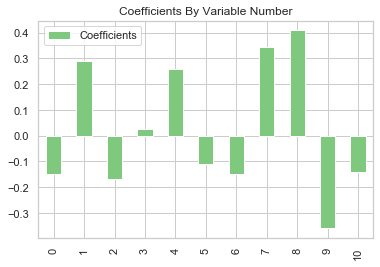

In [116]:
#Plotting Coefficients and Variable Number
coefs.plot(kind="bar",title="Coefficients By Variable Number",colormap = "Accent")

In [117]:
coefs

,Coefficients
0,-0.150579
1,0.291456
2,-0.168441
3,0.024251
4,0.260050
5,-0.109809
6,-0.146929
7,0.342872
8,0.408318
9,-0.359135


We can see from the coefficient results that the average cost of a healthy diet in a country, a country's GDP, qnd country's average PM2.5 exposure all seem to high predictors of the prevalence of cardiovascular diesease in a country. 

## L1 Regularization with Optimal Alpha

We can apply L1 regularization, or lasso regression, to combat any overfitting and conduct variable selection. This method adds absolute value of magnitude of the coefficients in our model as a penalty term to the loss function. 

In [118]:
#Imports
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

We can apply a cross-validation method to find the best alpha value for our model. 

In [119]:
#Applying cross-validation to find best alpha for l1 regularization
lcv_model = LassoCV(cv=5)
lcv_model.fit(X_train,y_train)
lcv_model.alpha_

C:\Users\guptaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\guptaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.00237525123665079

We can see that since the alpha value is quite small, our coefficients will not shrink greatly. We should get similar results as before. 

In [120]:
#Fitting best model with determined alpha
lbest = Lasso(alpha=lcv_model.alpha_)
lbest.fit(X_train,y_train)

C:\Users\guptaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


Lasso(alpha=0.00237525123665079)

In [121]:
print(list(zip(lbest.coef_, X)))

[(-0.0, ('East Asia & Pacific',)), (0.4213850682278124, ('Europe & Central Asia',)), (-0.046364317220133955, ('Latin America & Caribbean',)), (0.09859083013921253, ('Middle East & North Africa',)), (0.2873300300354022, ('North America',)), (-0.0, ('South Asia',)), (-0.048931114715671714, ('Sub-Saharan Africa',)), (0.08891405445770079, 'GDP'), (0.22769717584956917, 'Cost of Healthy Diet'), (-0.2535738936966955, 'PM2.5 Mean Exposure'), (-0.03677804552237306, 'Crime Index')]


In [122]:
lbestcoefs = pd.DataFrame(data = lbest.coef_)
lbestcoefs = coefs.rename({0:"Coefficients"}, axis=1)

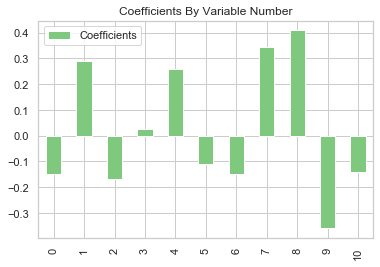

In [123]:
lbestcoefs.plot(kind="bar",title="Coefficients By Variable Number",colormap = "Accent")

In [124]:
lbestcoefs

,Coefficients
0,-0.150579
1,0.291456
2,-0.168441
3,0.024251
4,0.260050
5,-0.109809
6,-0.146929
7,0.342872
8,0.408318
9,-0.359135


In [125]:
#Evaluating model
r2train = lbest.score(X_train, y_train)*100
r2test = lbest.score(X_test, y_test)*100
mse = mean_squared_error(y_test, lbest.predict(X_test))

print("The model performance for testing set")
print("--------------------------------------")
print('R^2 training set is {}'.format(r2train))
print('R^2 test set is {}'.format(r2test))
print('MSE is {}'.format(mse))

The model performance for testing set
--------------------------------------
R^2 training set is 75.00541281002165
R^2 test set is 73.3737607575581
MSE is 0.01812031980269298


C:\Users\guptaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\guptaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\guptaj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


The virtually no change in coefficients indicates that either overfitting was not a problem for our original model or that the original model is simply not improved by L1 Regularization. 

Text(0.5, 1.0, 'Mean square error on each fold')

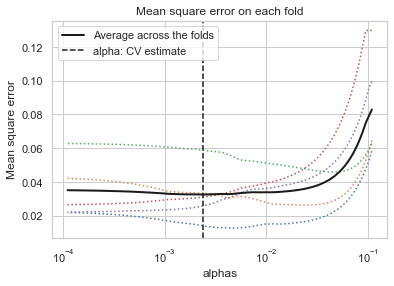

In [126]:
#Plotting Mean Squared Error with several alphas
plt.semilogx(lcv_model.alphas_, lcv_model.mse_path_, ":")
plt.plot(lcv_model.alphas_ ,lcv_model.mse_path_.mean(axis=-1),"k",label="Average across the folds",linewidth=2)
plt.axvline(lcv_model.alpha_, linestyle="--", color="k", label="alpha: CV estimate")
plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")

From the plot above, we can see that across various alpha values, the mean squared error largely stays consistent, though increased greatly in between 0.1 and 1. 

# Data Sources and Citations
- [1] Bhatnagar A. (2017). Environmental Determinants of Cardiovascular Disease. Circulation research, 121(2), 162–180. Retrieved July 14, 2023, from https://doi.org/10.1161/CIRCRESAHA.117.306458
- [2] Melillo, G. (2022, July 14). Heart disease deaths fall in areas with lower violent crime rates. The Hill. Retrieved July 14, 2023, from https://thehill.com/changing-america/well-being/longevity/3559359-heart-disease-deaths-fall-in-areas-with-lower-violent-crime-rates/
- [3] Global Burden of Disease Collaborative Network. (n.d.). Global Burden of Disease Study 2019 (GBD 2019) Data Resources | GHDx. Ghdx.healthdata.org; Institute for Health Metrics and Evaluation (IHME). Retrieved July 14, 2023, from https://ghdx.healthdata.org/gbd-2019
- [4] The World Bank. (2011). GDP (current US$) | Data. Worldbank.org. Retrieved July 14, 2023, from https://data.worldbank.org/indicator/NY.GDP.MKTP.PP.CD 
- [5] Food and Agriculture Organization of the United Nations (n.d.). Cost and Affordability of a Healthy Diet (CoAHD). FAOSTAT. Retrieved July 14, 2023, from https://www.fao.org/faostat/en/#data/CAHD 
- [6] Ritchie, H., & Roser, M. (2019, November 12). Outdoor Air Pollution. Our World in Data. Retrieved July 14, 2023, from https://ourworldindata.org/outdoor-air-pollution#citation  
- [7] Numbeo. (2019). Crime Index by Country 2019. Numbeo.com. Retrieved July 14, 2023, from https://www.numbeo.com/crime/rankings_by_country.jsp